<a href="https://colab.research.google.com/github/SK-Faizan-Nasir/TitanicSurvivalPrediction/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score

In [ ]:
df=pd.read_csv("titanic_train.csv")

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.drop(['PassengerId','Name',"Cabin","Ticket"],axis=1,inplace=True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
df["Sex"]=df["Sex"].map({'male':1,'female':0})
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
5,0,3,1,NaN,0,0,8.4583,Q
6,0,1,1,54.0,0,0,51.8625,S
7,0,3,1,2.0,3,1,21.0750,S
8,1,3,0,27.0,0,2,11.1333,S
9,1,2,0,14.0,1,0,30.0708,C


Male - 1
Female - 0

In [ ]:
emb=pd.get_dummies(df["Embarked"])

In [ ]:
emb.head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [ ]:
df.drop("Embarked",axis=1,inplace=True)
df=pd.concat([df,emb],axis=1)

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1
5,0,3,1,NaN,0,0,8.4583,0,1,0
6,0,1,1,54.0,0,0,51.8625,0,0,1
7,0,3,1,2.0,3,1,21.0750,0,0,1
8,1,3,0,27.0,0,2,11.1333,0,0,1
9,1,2,0,14.0,1,0,30.0708,1,0,0


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'C', 'Q',
       'S'],
      dtype='object')

In [ ]:
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [ ]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
5,0,3,1,29.699118,0,0,8.4583,0,1,0
6,0,1,1,54.000000,0,0,51.8625,0,0,1
7,0,3,1,2.000000,3,1,21.0750,0,0,1
8,1,3,0,27.000000,0,2,11.1333,0,0,1
9,1,2,0,14.000000,1,0,30.0708,1,0,0


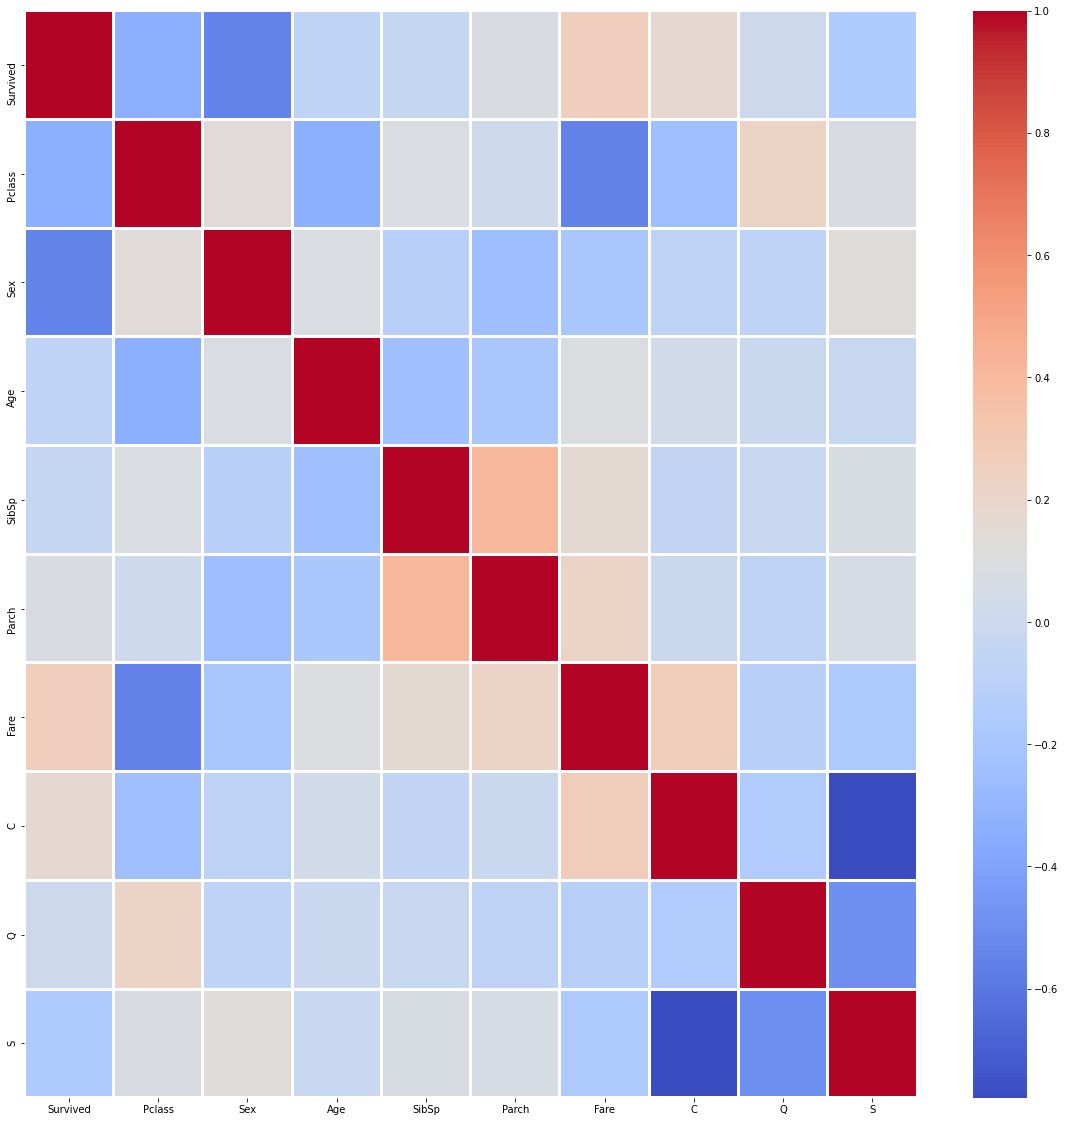

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap="coolwarm",linewidths=2)

In [ ]:
Y=df["Survived"]

In [ ]:
Y.unique()

array([0, 1])

In [ ]:
X=df.drop("Survived",axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.18)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf=SVC(kernel="linear").fit(x_train,y_train)
pred=clf.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,pred))

Accuracy is:  0.7701863354037267


In [ ]:
cross_val_score(clf,X,Y,cv=5).mean()

0.7878601468834348

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf_rf=RandomForestClassifier().fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,pred))

Accuracy is:  0.8322981366459627


In [ ]:
cross_val_score(clf_rf,X,Y,cv=5).mean()

0.812591802146758

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier().fit(x_train,y_train)
pred=clf_xgb.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,pred))

Accuracy is:  0.8260869565217391


In [ ]:
cross_val_score(clf_xgb,X,Y,cv=5).mean()

0.8181972255351202

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_po...ight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=4,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
                         'gamma': [0.0, 0.1, 0.

In [ ]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, eta=0.05, gamma=0.2,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
clf.fit(x_train,y_train)
pred=clf.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,pred))

Accuracy is:  0.8509316770186336


In [ ]:
cross_val_score(clf,X,Y,cv=5).mean()

0.8216119515410207